In [1]:
# Importing req. libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
# Importing dataset

fifa = pd.read_csv("FullData.csv")

In [3]:
fifa.head(7)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89
5,De Gea,Spain,GK,1.0,Manchester Utd,GK,1.0,07/01/2011,2019.0,90,...,12,21,19,40,13,86,88,87,85,90
6,Robert Lewandowski,Poland,LS,9.0,FC Bayern,ST,9.0,07/01/2014,2021.0,90,...,82,77,76,81,86,8,15,12,6,10


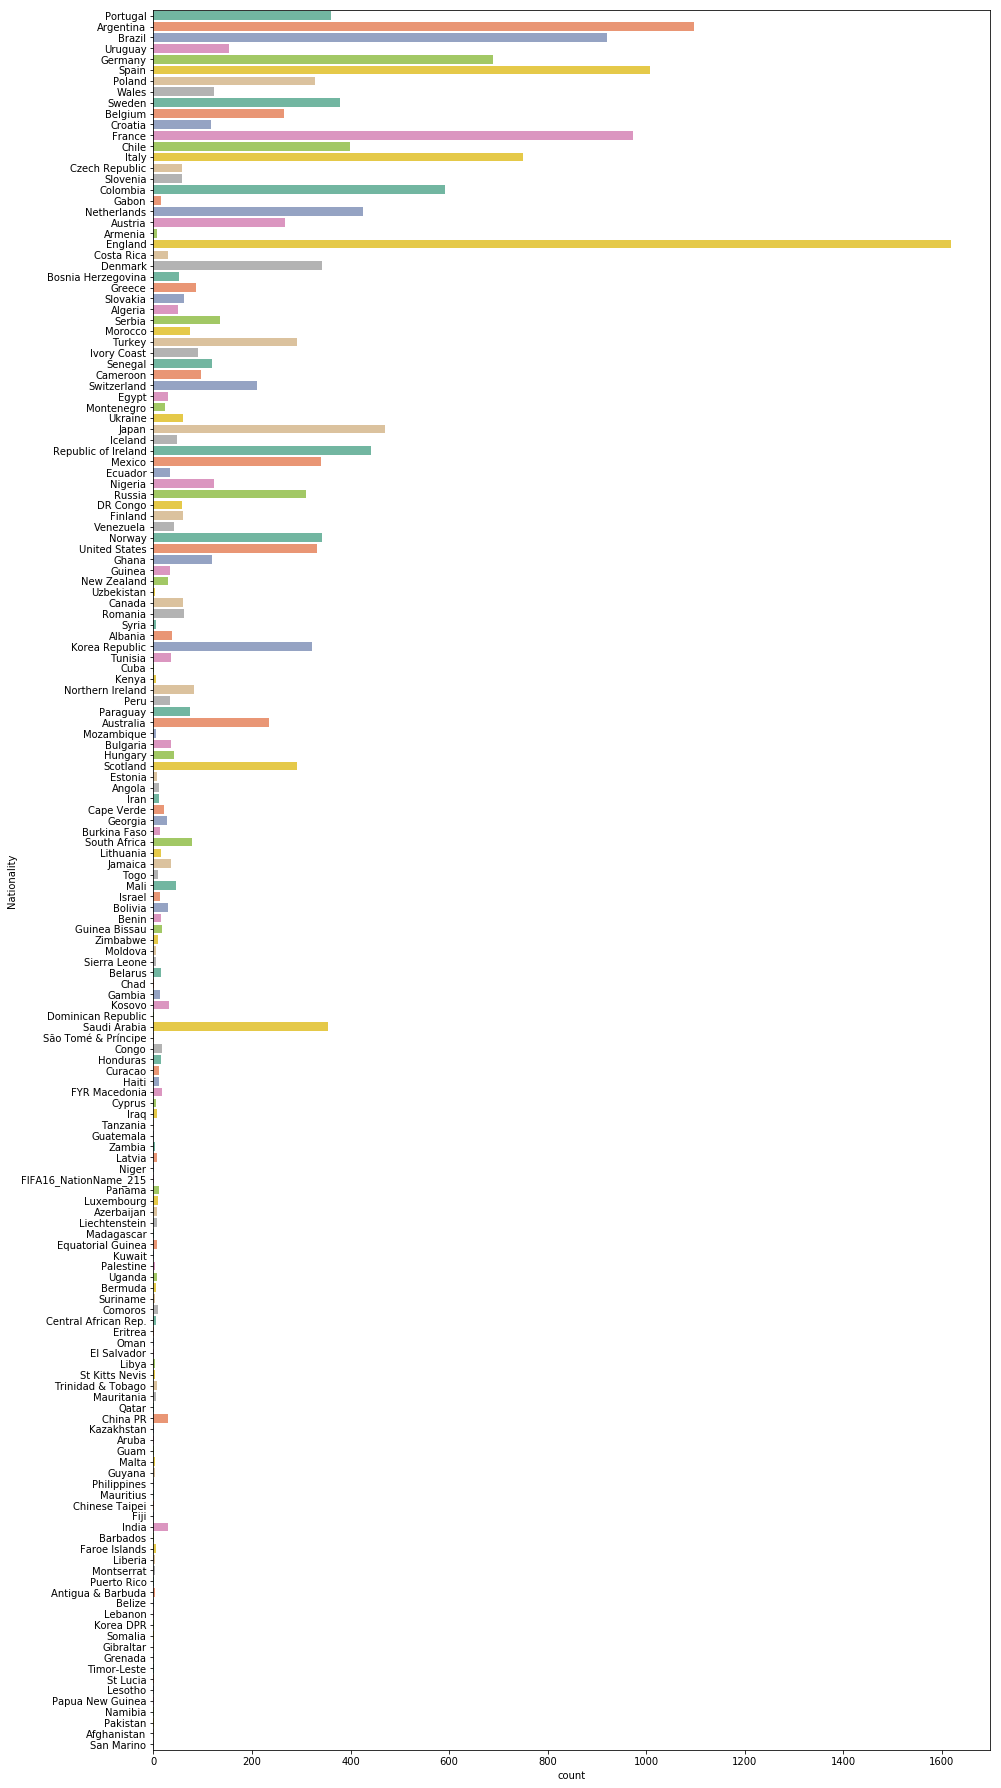

In [5]:
plt.figure(figsize=(15,32))

# Count plot of all nations on Y-axis
sns.countplot(y = fifa.Nationality, palette = "Set2") 

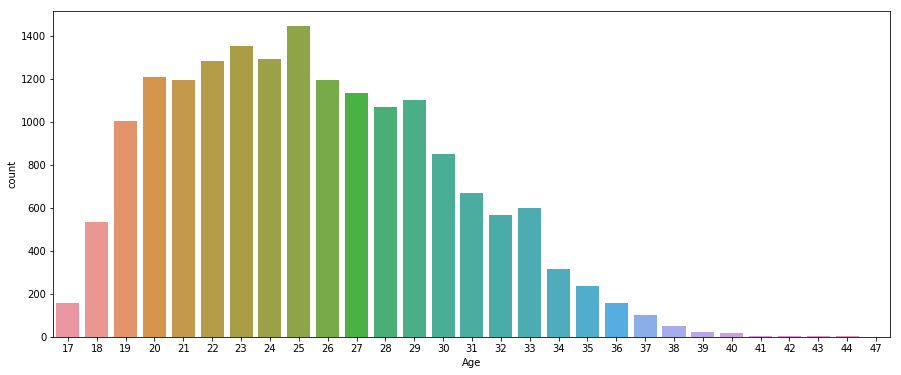

In [6]:
plt.figure(figsize = (15, 6))

sns.countplot(x = "Age", data = fifa)

#                                            LINEUP -> 4-3-3

## ------------------------------------- Finding the Best Goalkeeper(GK) -------------------------------------------

In [7]:
# weights

a, b, c, d = 0.5, 1, 2, 3

In [8]:
# GoalKeeping Characteristics

# Shot Stopper - GK who is strong enough to stop the shots taken by the opponent
fifa['gk_Shot_Stopper'] = (b*fifa.Reactions + b*fifa.Composure + a*fifa.Speed + a*fifa.Strength + c*fifa.Jumping + b*fifa.GK_Positioning + c*fifa.GK_Diving + d*fifa.GK_Reflexes + b*fifa.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
# Sweeper - GK who is efficient enough with his speed and passes
fifa['gk_Sweeper'] = (b*fifa.Reactions + b*fifa.Composure + b*fifa.Speed + a*fifa.Short_Pass + a*fifa.Long_Pass + b*fifa.Jumping + b*fifa.GK_Positioning + b*fifa.GK_Diving + d*fifa.GK_Reflexes + b*fifa.GK_Handling + d*fifa.GK_Kicking + c*fifa.Vision)/(2*a + 7*b + 1*c + 2*d)

Text(0,0.5,'Shot Stopping Score')

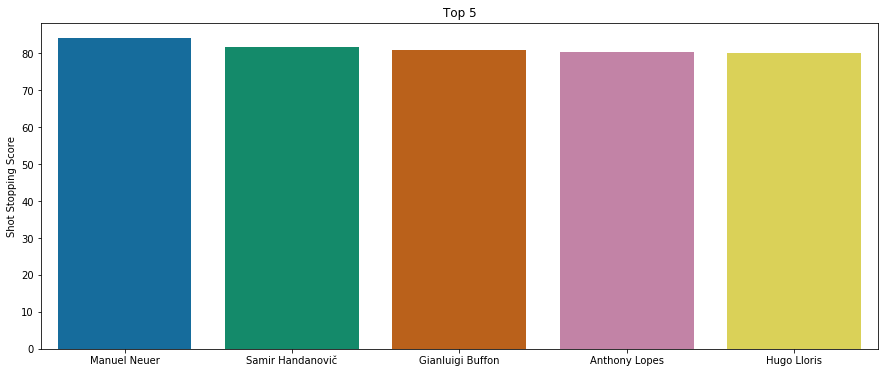

In [9]:
plt.figure(figsize = (15, 6))

# Generating sequential data and plot
sd1 = fifa.sort_values('gk_Shot_Stopper', ascending = False)[:5]

x1 = np.array(list(sd1['Name']))
y1 = np.array(list(sd1['gk_Shot_Stopper']))

sns.barplot(x1, y1, palette = "colorblind")
plt.title('Top 5')
plt.ylabel("Shot Stopping Score")

Text(0,0.5,'Sweeping Score')

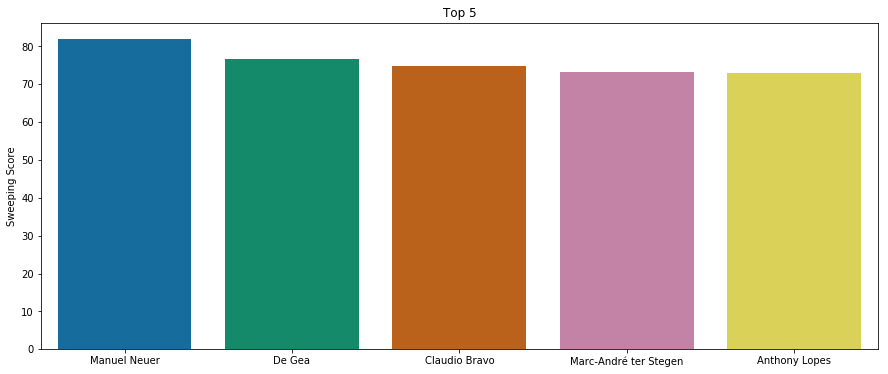

In [10]:
plt.figure(figsize = (15, 6))

# Generating sequential data and plot
sd1 = fifa.sort_values('gk_Sweeper', ascending = False)[:5]

x1 = np.array(list(sd1['Name']))
y1 = np.array(list(sd1['gk_Sweeper']))

sns.barplot(x1, y1, palette = "colorblind")
plt.title('Top 5')
plt.ylabel("Sweeping Score")

### Best GK - Manuel Neuer

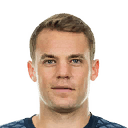

In [36]:
from IPython.display import Image
Image(filename='Pictures/Manuel Neuer.png', embed=True)

## ----------------------------------------- Finding the 4 Best Defenders ----------------------------------------

##### Centre Backs: We need two center-backs. One who plays LCB and the other who plays RCB.
##### Wing Backs: We again need two wing backs. One who plays on the Left and the other who plays on the right.

In [12]:
#Choosing Defenders
fifa['fifa_centre_backs'] = ( d*fifa.Reactions + c*fifa.Interceptions + d*fifa.Sliding_Tackle + d*fifa.Standing_Tackle 
                         + b*fifa.Vision + b*fifa.Composure + b*fifa.Crossing +a*fifa.Short_Pass + b*fifa.Long_Pass 
                         + c*fifa.Acceleration + b*fifa.Speed + d*fifa.Stamina + d*fifa.Jumping + d*fifa.Heading 
                         + b*fifa.Long_Shots + d*fifa.Marking + c*fifa.Aggression)/(6*b + 3*c + 7*d)
fifa['fifa_wb_Wing_Backs'] = (b*fifa.Ball_Control + a*fifa.Dribbling + a*fifa.Marking + d*fifa.Sliding_Tackle + d*fifa.Standing_Tackle 
                          + a*fifa.Attacking_Position + c*fifa.Vision + c*fifa.Crossing + b*fifa.Short_Pass + c*fifa.Long_Pass 
                          + d*fifa.Acceleration +d*fifa.Speed + c*fifa.Stamina + a*fifa.Finishing)/(4*a + 2*b + 4*c + 4*d)

#### LEFT CENTRAL DEFENDER:

Text(0,0.5,'LCB Score')

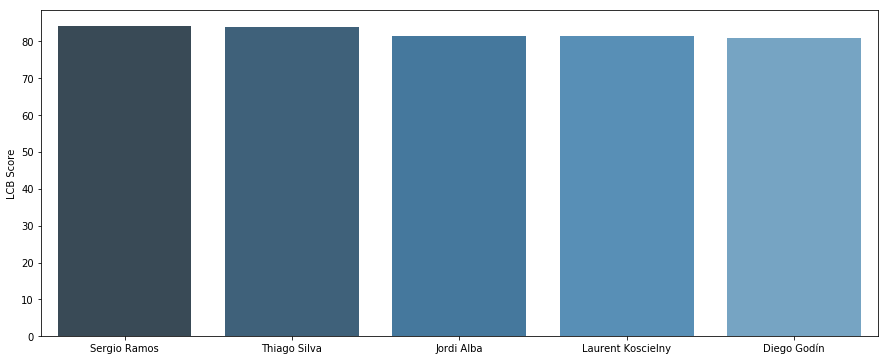

In [13]:
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Club_Position'] == 'LCB')].sort_values('fifa_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['fifa_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

##### Based on the left centre back characteristics, it can be inferred that Sergio Ramos is the Best Left Central Defender.

### LEFT CENTRAL DEFENDER: Sergio Ramos

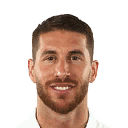

In [37]:
from IPython.display import Image
Image(filename='Pictures/Sergio Ramos.png', embed=True)

#### RIGHT CENTRAL DEFENDER:

Text(0,0.5,'RCB Score')

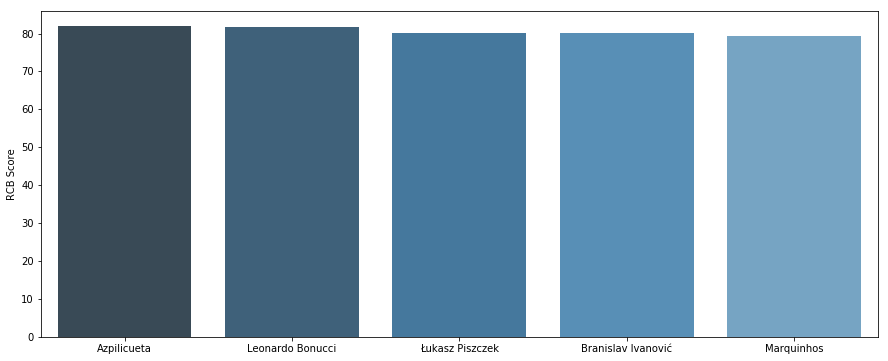

In [15]:
plt.figure(figsize=(15,6))
 
sd = fifa[(fifa['Club_Position'] == 'RCB')].sort_values('fifa_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['fifa_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

##### Based on the right centre back characteristics, it can be inferred that Azpilicueta is the Best Right Central Defender. 

### RIGHT CENTRAL DEFENDER: Azpilicueta

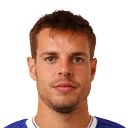

In [39]:
from IPython.display import Image
Image(filename='Pictures/Azpilicueta.png', embed=True)

#### LEFT WING BACK:

Text(0,0.5,'Left Back Score')

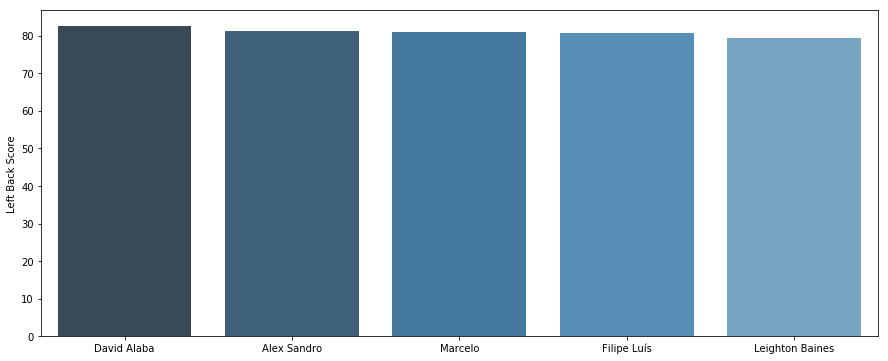

In [17]:
plt.figure(figsize=(15,6))
 
sd = fifa[(fifa['Club_Position'] == 'LWB') | (fifa['Club_Position'] == 'LB')].sort_values('fifa_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['fifa_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

##### Since David Alaba’s team does not qualify in the world cup 2018, I’ll be picking Alex Sandro as the best LWB/LB defender.

### LEFT WING BACK: Alex Sandro

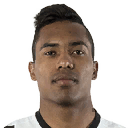

In [40]:
from IPython.display import Image
Image(filename='Pictures/Alex Sandro.png', embed=True)

#### RIGHT WING BACK:

Text(0,0.5,'Right Back Score')

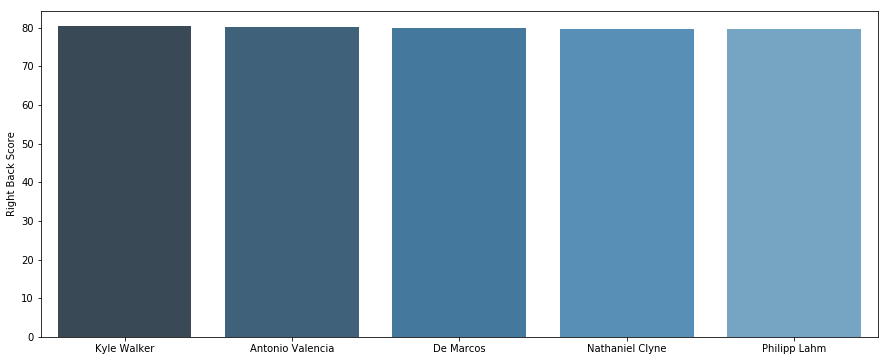

In [19]:
plt.figure(figsize=(15,6))
sd = fifa[(fifa['Club_Position'] == 'RWB') | (fifa['Club_Position'] == 'RB')].sort_values('fifa_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['fifa_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

##### As per the above analysis, it is evident that Kyle Walker is the best RWB/RB for World Cup 2018.

### RIGHT WING BACK: Kyle Walker

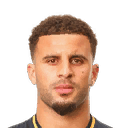

In [41]:
from IPython.display import Image
Image(filename='Pictures/Kyle Walker.png', embed=True)

### ------------------------------------------------------ Finding The Best Mid-Fielders -------------------------------------------------------

#### Playmaker: A playmaker is someone who will move the ball to the attacking 3rd from defence or midfield.
#### Beast: A beast is a typical box-to-box player with loads of energy and who can boss the midfield.
#### Controller: A controller is the person who is orchestrating your midfield engine by either sitting back or going forward based on dynamic needs.


In [21]:
#Midfielding Indices
fifa['mf_playmaker'] = (d*fifa.Ball_Control + d*fifa.Dribbling + a*fifa.Marking + d*fifa.Reactions + d*fifa.Vision + c*fifa.Attacking_Position + c*fifa.Crossing + d*fifa.Short_Pass + c*fifa.Long_Pass + c*fifa.Curve + b*fifa.Long_Shots + c*fifa.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
fifa['mf_beast'] = (d*fifa.Agility + c*fifa.Balance + b*fifa.Jumping + c*fifa.Strength + d*fifa.Stamina + a*fifa.Speed + c*fifa.Acceleration + d*fifa.Short_Pass + c*fifa.Aggression + d*fifa.Reactions + b*fifa.Marking + b*fifa.Standing_Tackle + b*fifa.Sliding_Tackle + b*fifa.Interceptions)/(1*a + 5*b + 4*c + 4*d)
fifa['mf_controller'] = (b*fifa.Weak_foot + d*fifa.Ball_Control + a*fifa.Dribbling + a*fifa.Marking + a*fifa.Reactions + c*fifa.Vision + c*fifa.Composure + d*fifa.Short_Pass + d*fifa.Long_Pass)/(2*c + 3*d + 4*a)

### PLAYMAKER

Text(0,0.5,'PlayMaker Score')

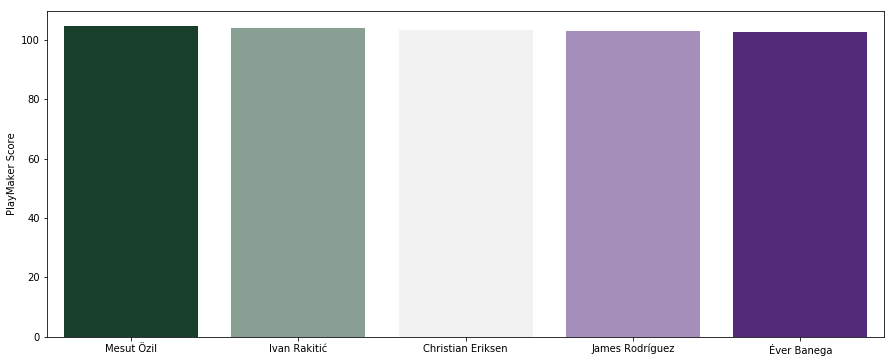

In [22]:
plt.figure(figsize=(15,6))
 
ss = fifa[(fifa['Club_Position'] == 'CAM') | (fifa['Club_Position'] == 'LAM') | (fifa['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

#### As per the above analysis, I’ll pick Mesut Ozil as the best Playmaker for World Cup 2018.

### CENTRAL MIDFIELDER (CAM) - Mesut Ozil

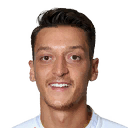

In [42]:
from IPython.display import Image
Image(filename='Pictures/Mesut Ozil.png', embed=True)

### Beast

Text(0,0.5,'Beast Score')

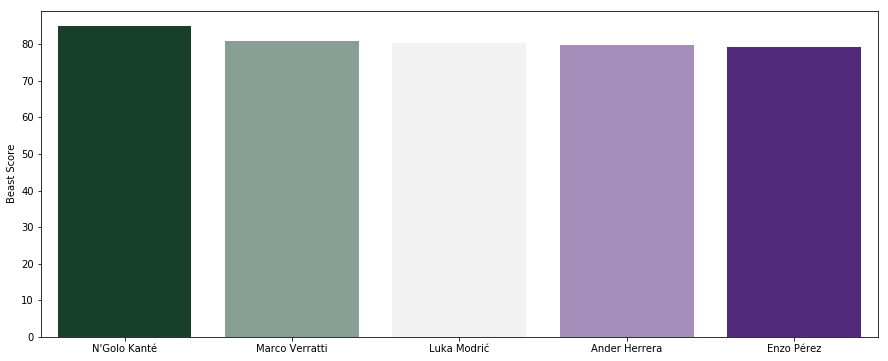

In [24]:
plt.figure(figsize=(15,6))
 
ss = fifa[(fifa['Club_Position'] == 'RCM') | (fifa['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

#### As per the above analysis, I’ll pick N’ Golo Kante as the best Beast/ Right Central Midfielder.


### RIGHT CENTRAL MIDFIELDER - N' Golo Kante

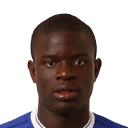

In [43]:
from IPython.display import Image
Image(filename='Pictures/NGolo Kant.png', embed=True)

### Controller

Text(0,0.5,'Controller Score')

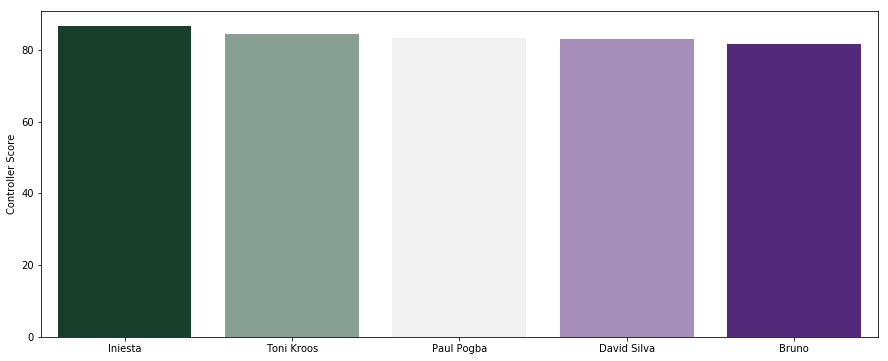

In [26]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = fifa[(fifa['Club_Position'] == 'LCM') | (fifa['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

#### As per the above analysis, I’ll pick Iniesta as the best controller/ Left Central Midfielder.

### LEFT CENTRAL MIDFIELDER - Andreas Iniesta

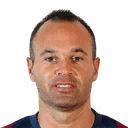

In [44]:
from IPython.display import Image
Image(filename='Pictures/Iniesta.png', embed=True)

### ------------------------------------------------------ Finding The Best Attackers ----------------------------------------------------------

#### Attacking Left Wing: He is a player, attacking from the left flank.
#### Attacking Right Wing: He is a player, attacking from the right flank.
#### Striker: He is a player attacking from the center.

In [28]:
#Attackers
fifa['att_left_wing'] = (c*fifa.Weak_foot + c*fifa.Ball_Control + c*fifa.Dribbling + c*fifa.Speed + d*fifa.Acceleration + b*fifa.Vision + c*fifa.Crossing + b*fifa.Short_Pass + b*fifa.Long_Pass + b*fifa.Aggression + b*fifa.Agility + a*fifa.Curve + c*fifa.Long_Shots + b*fifa.Freekick_Accuracy + d*fifa.Finishing)/(a + 6*b + 6*c + 2*d)
fifa['att_right_wing'] = (c*fifa.Weak_foot + c*fifa.Ball_Control + c*fifa.Dribbling + c*fifa.Speed + d*fifa.Acceleration + b*fifa.Vision + c*fifa.Crossing + b*fifa.Short_Pass + b*fifa.Long_Pass + b*fifa.Aggression + b*fifa.Agility + a*fifa.Curve + c*fifa.Long_Shots + b*fifa.Freekick_Accuracy + d*fifa.Finishing)/(a + 6*b + 6*c + 2*d)
fifa['att_striker'] = (b*fifa.Weak_foot + b*fifa.Ball_Control + a*fifa.Vision + b*fifa.Aggression + b*fifa.Agility + a*fifa.Curve + a*fifa.Long_Shots + d*fifa.Balance + d*fifa.Finishing + d*fifa.Heading + c*fifa.Jumping + c*fifa.Dribbling)/(3*a + 4*b + 2*c + 3*d)

### Left Wing

Text(0,0.5,'Left Wing')

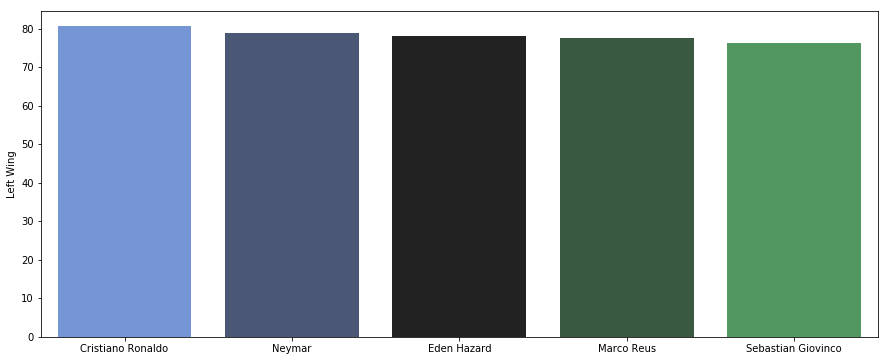

In [29]:
plt.figure(figsize=(15,6))
 
ss = fifa[(fifa['Club_Position'] == 'LW') | (fifa['Club_Position'] == 'LM') | (fifa['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

#### It’s quite evident from the above plot that Ronaldo is the best Left Wing Attacker for World Cup 2018.

### LEFT WING - Cristiano Ronaldo

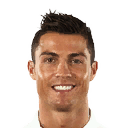

In [45]:
from IPython.display import Image
Image(filename='Pictures/Cristiano Ronaldo.png', embed=True)

### Right Wing

Text(0,0.5,'Right Wing')

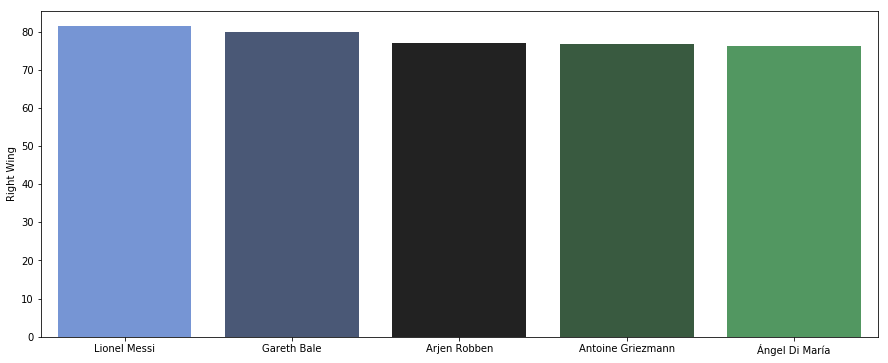

In [31]:
plt.figure(figsize=(15,6))
 
ss = fifa[(fifa['Club_Position'] == 'RW') | (fifa['Club_Position'] == 'RM') | (fifa['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

#### As per the above analysis, I’ll pick Lionel Messi as the right wing attacker for World Cup 2018.

### RIGHT WING - Lionel Messi

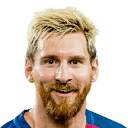

In [46]:
from IPython.display import Image
Image(filename='Pictures/Lionel Messi.png', embed=True)

### Striker

Text(0,0.5,'Striker')

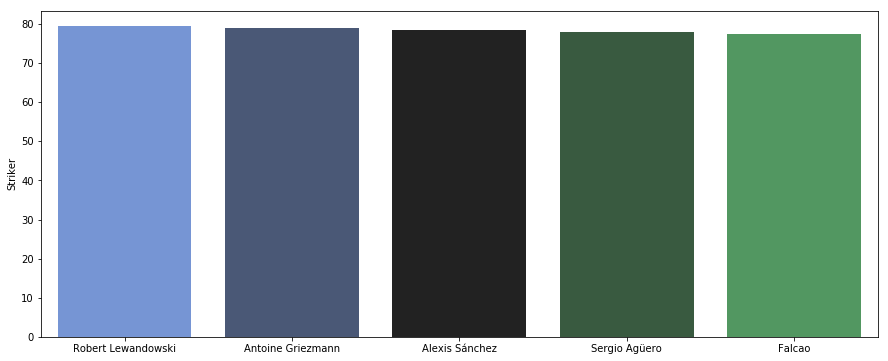

In [33]:
plt.figure(figsize=(15,6))
ss = fifa[(fifa['Club_Position'] == 'ST') | (fifa['Club_Position'] == 'LS') | (fifa['Club_Position'] == 'RS') | (fifa['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")

#### As per the above analysis, the best striker for World Cup 2018 would be Robert Lewandowski.

### STRIKER - Robert Lewandowski

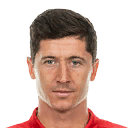

In [47]:
from IPython.display import Image
Image(filename='Pictures/Robert Lewandowski.png', embed=True)

## ----------------------------------------- World's Best Playing XI ------------------------------------------------

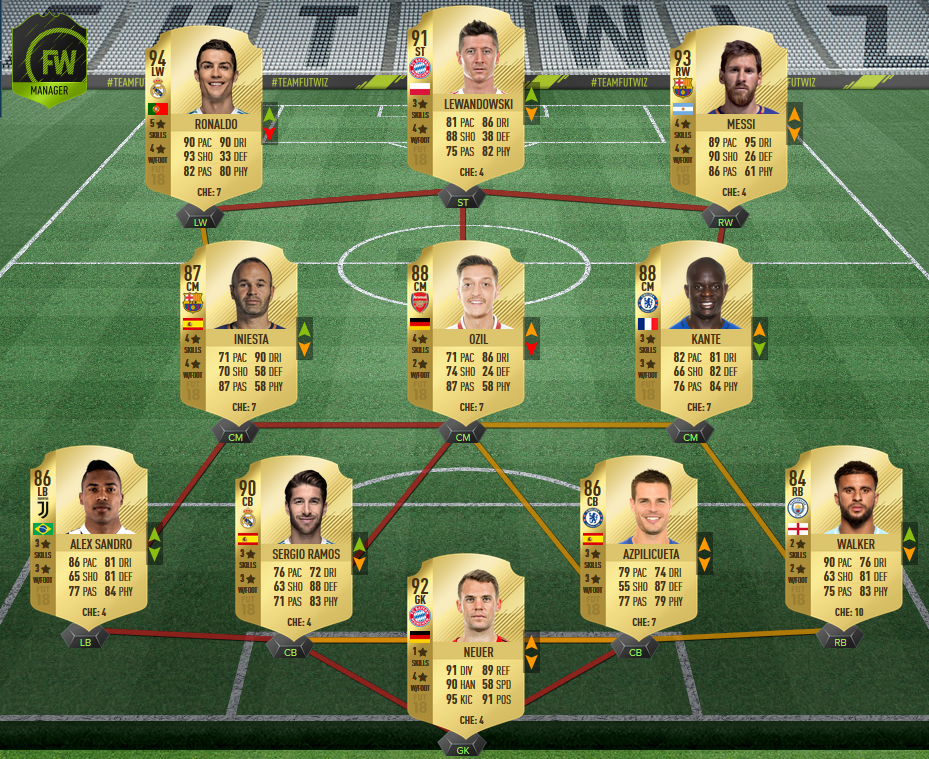

In [48]:
from IPython.display import Image
Image(filename='TopXI.png', embed=True)